# Data Exploration, Feature Engineering and Analysis

## Importing Modules

In [1]:
import Helper as hp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
# Boolean to update the output or just load them from disk
# Change to True if you want to update the values stored on disk
update_results = False

## Data Exploration

### Input Data

In [3]:
input_data = hp.read_input_data()
test_data = hp.read_test_data()
Y2 = hp.read_Y(os.getcwd()+"/Data/Y2.csv")
Y2 = [int(y2) for y2 in Y2]
input_data_df = pd.DataFrame.from_dict(input_data)
input_data_df["valid_or_not"] = Y2
features1 = hp.time_series2features(input_data["ramposition"],
                                    input_data["ramposition_time"])

In [4]:
input_data_df.head()

,ramposition,ramposition_time,injection_pressure,injection_pressure_time,sensor_pressure,sensor_pressure_time,valid_or_not
0,"[0.071227, 0.070499, 0.06996, 0.06934, 0.06879...","[0.00669, 0.015201, 0.021505, 0.028743, 0.0350...","[0.0, 2836400.0, 5461800.0, 7290900.0, 9201700...","[0.0, 0.00669, 0.015201, 0.021505, 0.028743, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00669, 0.015201, 0.021505, 0.028743, 0.0350...",1
1,"[0.071227, 0.070506, 0.069968, 0.069349, 0.068...","[0.007142, 0.016141, 0.022851, 0.03058, 0.0373...","[0.0, 2719500.0, 5223100.0, 6981400.0, 8817000...","[0.0, 0.007142, 0.016141, 0.022851, 0.03058, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.007142, 0.016141, 0.022851, 0.03058, 0.0373...",1
2,"[0.071227, 0.07048, 0.069943, 0.06933, 0.06878...","[0.0074, 0.017065, 0.023998, 0.03193, 0.038993...","[0.0, 2985100.0, 5853000.0, 7770100.0, 9795700...","[0.0, 0.0074, 0.017065, 0.023998, 0.03193, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0074, 0.017065, 0.023998, 0.03193, 0.038993...",1
3,"[0.071227, 0.070522, 0.069982, 0.069359, 0.068...","[0.007268, 0.016227, 0.023072, 0.030986, 0.037...","[0.0, 2510300.0, 4774100.0, 6414900.0, 8109300...","[0.0, 0.007268, 0.016227, 0.023072, 0.030986, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.007268, 0.016227, 0.023072, 0.030986, 0.037...",1
4,"[0.071227, 0.070501, 0.069961, 0.069342, 0.068...","[0.006897, 0.015651, 0.022148, 0.029611, 0.036...","[0.0, 2795600.0, 5384200.0, 7191900.0, 9078600...","[0.0, 0.006897, 0.015651, 0.022148, 0.029611, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.006897, 0.015651, 0.022148, 0.029611, 0.036...",1


In [5]:
# Checking datatypes
input_data_df.dtypes

ramposition                object
ramposition_time           object
injection_pressure         object
injection_pressure_time    object
sensor_pressure            object
sensor_pressure_time       object
valid_or_not                int64
dtype: object

#### Distinction between Valid Bins and Non-Valid Bins

In [6]:
# Selection of non-defectous bins (here called valid_bins)
valid_bins = input_data_df[input_data_df["valid_or_not"] == 1]
not_valid_bins = input_data_df[input_data_df["valid_or_not"] == 0]
n_valid_bins = len(valid_bins)
n_not_valid_bins = len(not_valid_bins)
print(f"The number of valid bins is {n_valid_bins} which correspond to the \
      {n_valid_bins/len(input_data_df)*100:.2f} %")
print(f"The number of not valid bins is {n_not_valid_bins} which correspond \
      to the {n_not_valid_bins/len(input_data_df)*100:.2f} %")

The number of valid bins is 1080 which correspond to the       70.04 %
The number of not valid bins is 462 which correspond       to the 29.96 %


In [7]:
# function to plot the three time series consecutively
def show3_time_series(rpt, rp, ipt, ip, pt, p, v) -> None:
    """
    rpt, rp: ramposition time, ramposition
    ipt, ip: injection pressure time, injection pressure
    pt, p:   pressure time, pressure
    v: valid or not valid
    """
    # defaults are: figsize=(6.4, 4.8) width and height in inches, dpi=100 default
    fs = 20  # fontsize
    lw = 5  # linewidth
    fig = plt.figure(figsize=[30, 8])
    if v:
        fig.suptitle('Consecutive Time Series Whole Process (Valid Bin)', fontsize=fs*1.5)
    else:
        fig.suptitle('Consecutive Time Series Whole Process (Not Valid Bin)', fontsize=fs*1.5)
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    axs = [ax1, ax2, ax3]
    for ax in axs:
        ax.minorticks_on()
        ax.tick_params('both', length=20, width=2, which='major', labelsize=fs)
        ax.tick_params('both', length=10, width=1, which='minor', labelsize=fs)
        ax.set_xlabel('Time (ms)', fontsize=fs)
    ax1.plot(rpt, rp, color='c', linewidth=lw)
    ax1.set_title('Ram Position', fontsize=fs)
    ax1.set_ylabel('Ram Position', fontsize=fs)
    ax2.plot(ipt, ip, color='y', linewidth=lw)
    ax2.set_title('Injection Pressure', fontsize=fs)
    ax2.set_ylabel('Injection Pressure', fontsize=fs)
    ax2.set(xlabel='Time (ms)', ylabel='Injection Pressure')
    ax3.plot(pt, p, color='purple', linewidth=lw)
    ax3.set_title('Sensor Pressure', fontsize=fs)
    ax3.set_ylabel('Sensor Pressure', fontsize=fs)
    plt.show()

- We select a random population of equal size for valid and not valid bins

In [8]:
# to be able to plot the entries by index
not_valid_bins = not_valid_bins.reset_index()
valid_bins = valid_bins.reset_index()

[756 701 841]
[322 221 266]
756


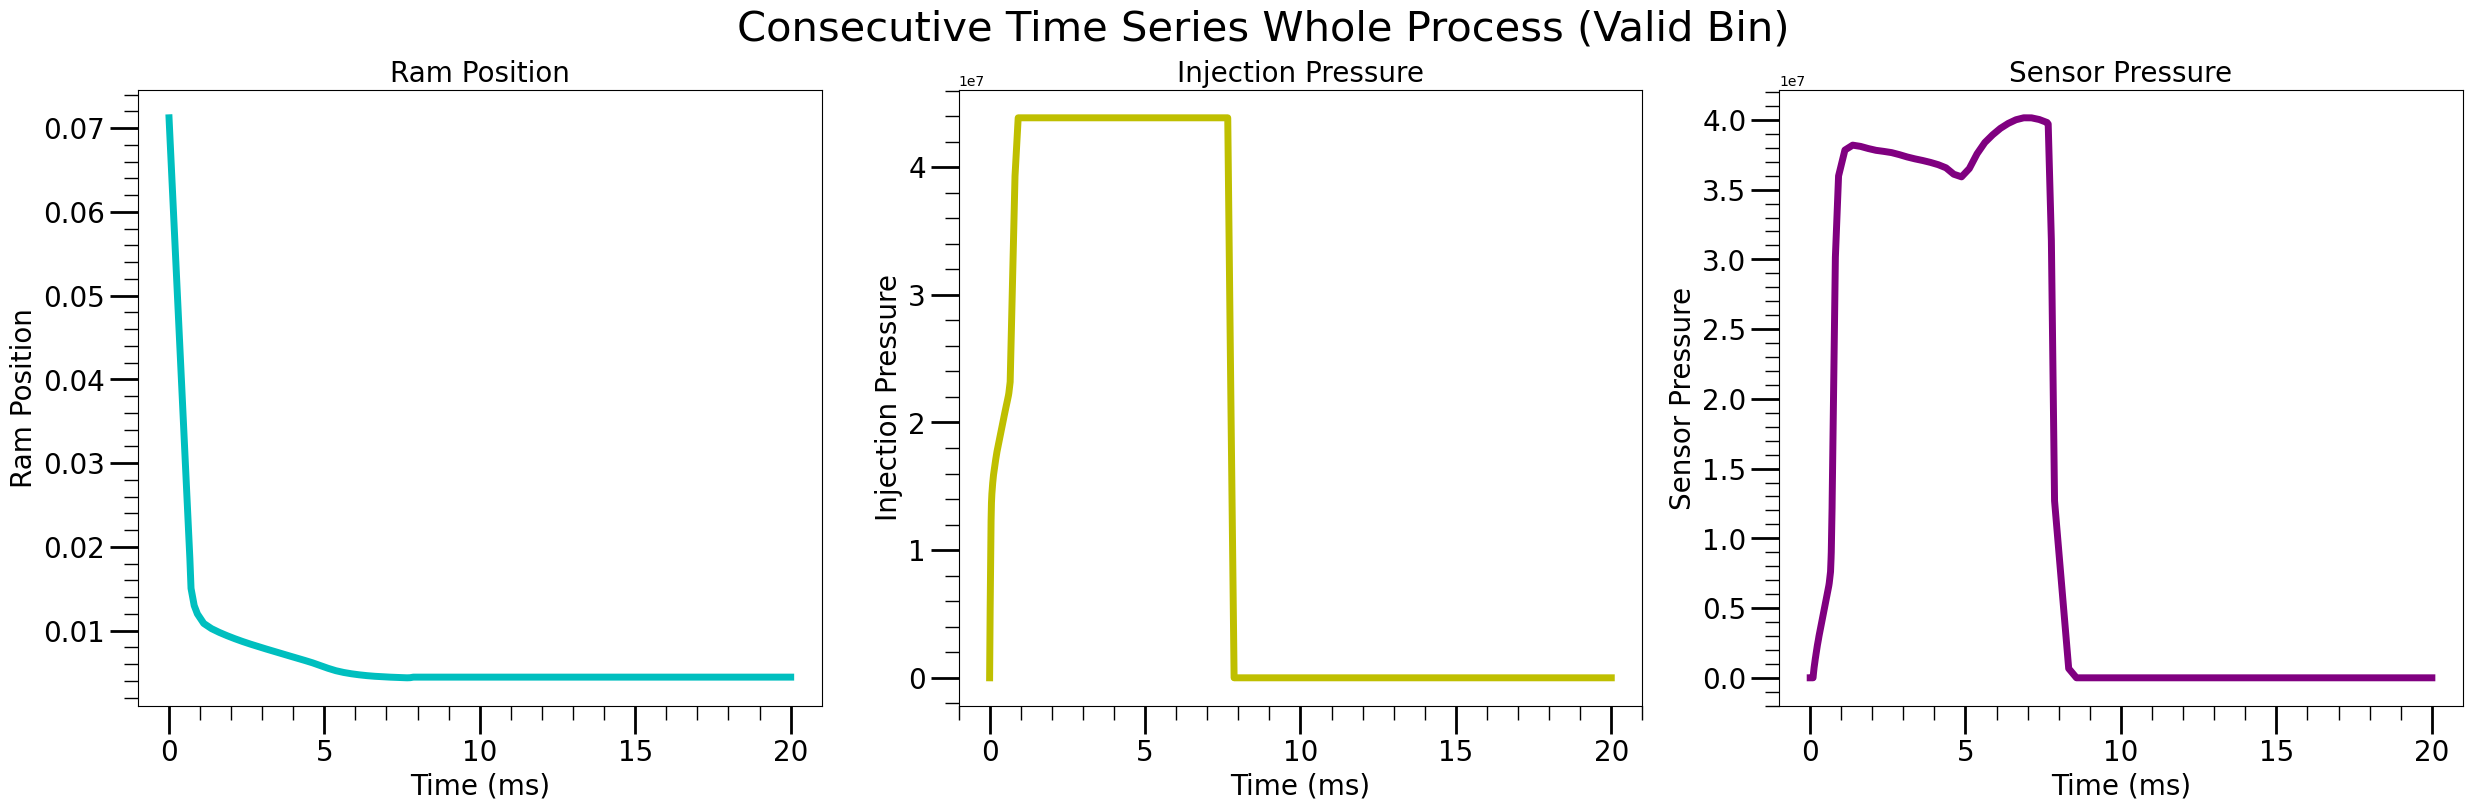

322


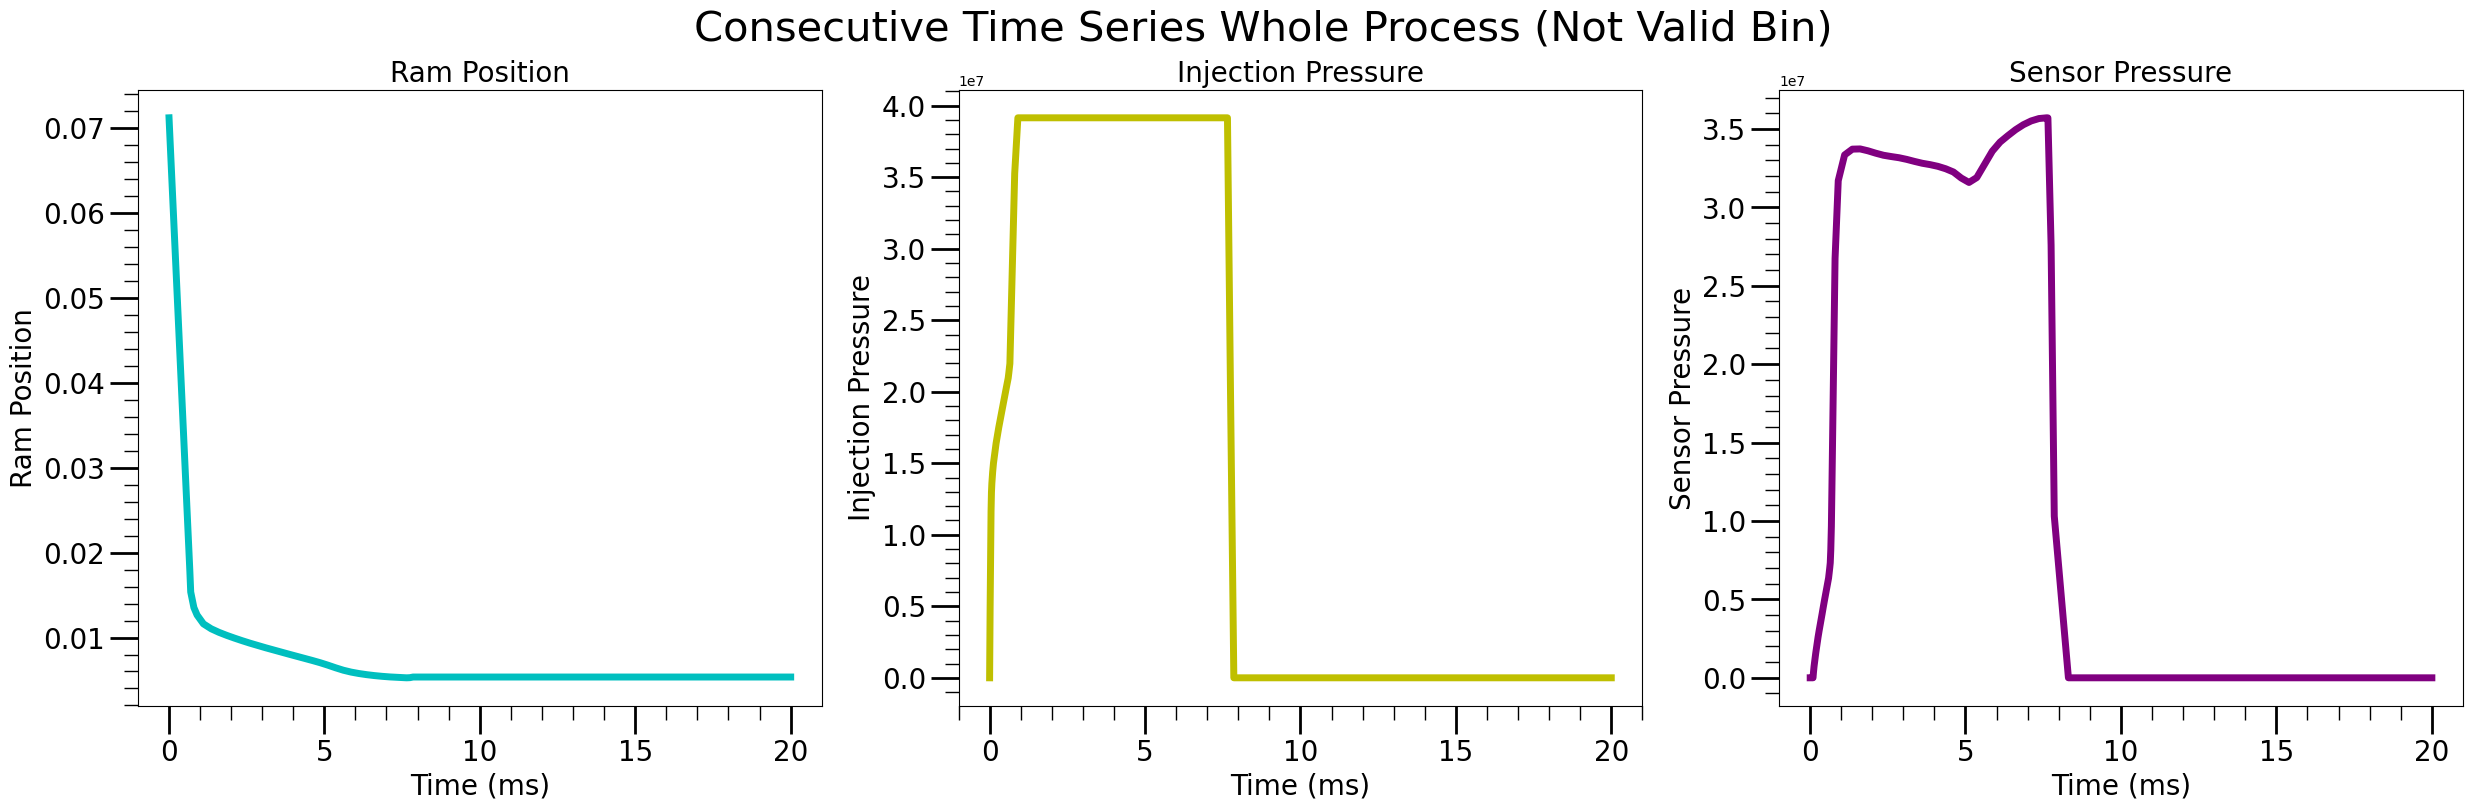

701


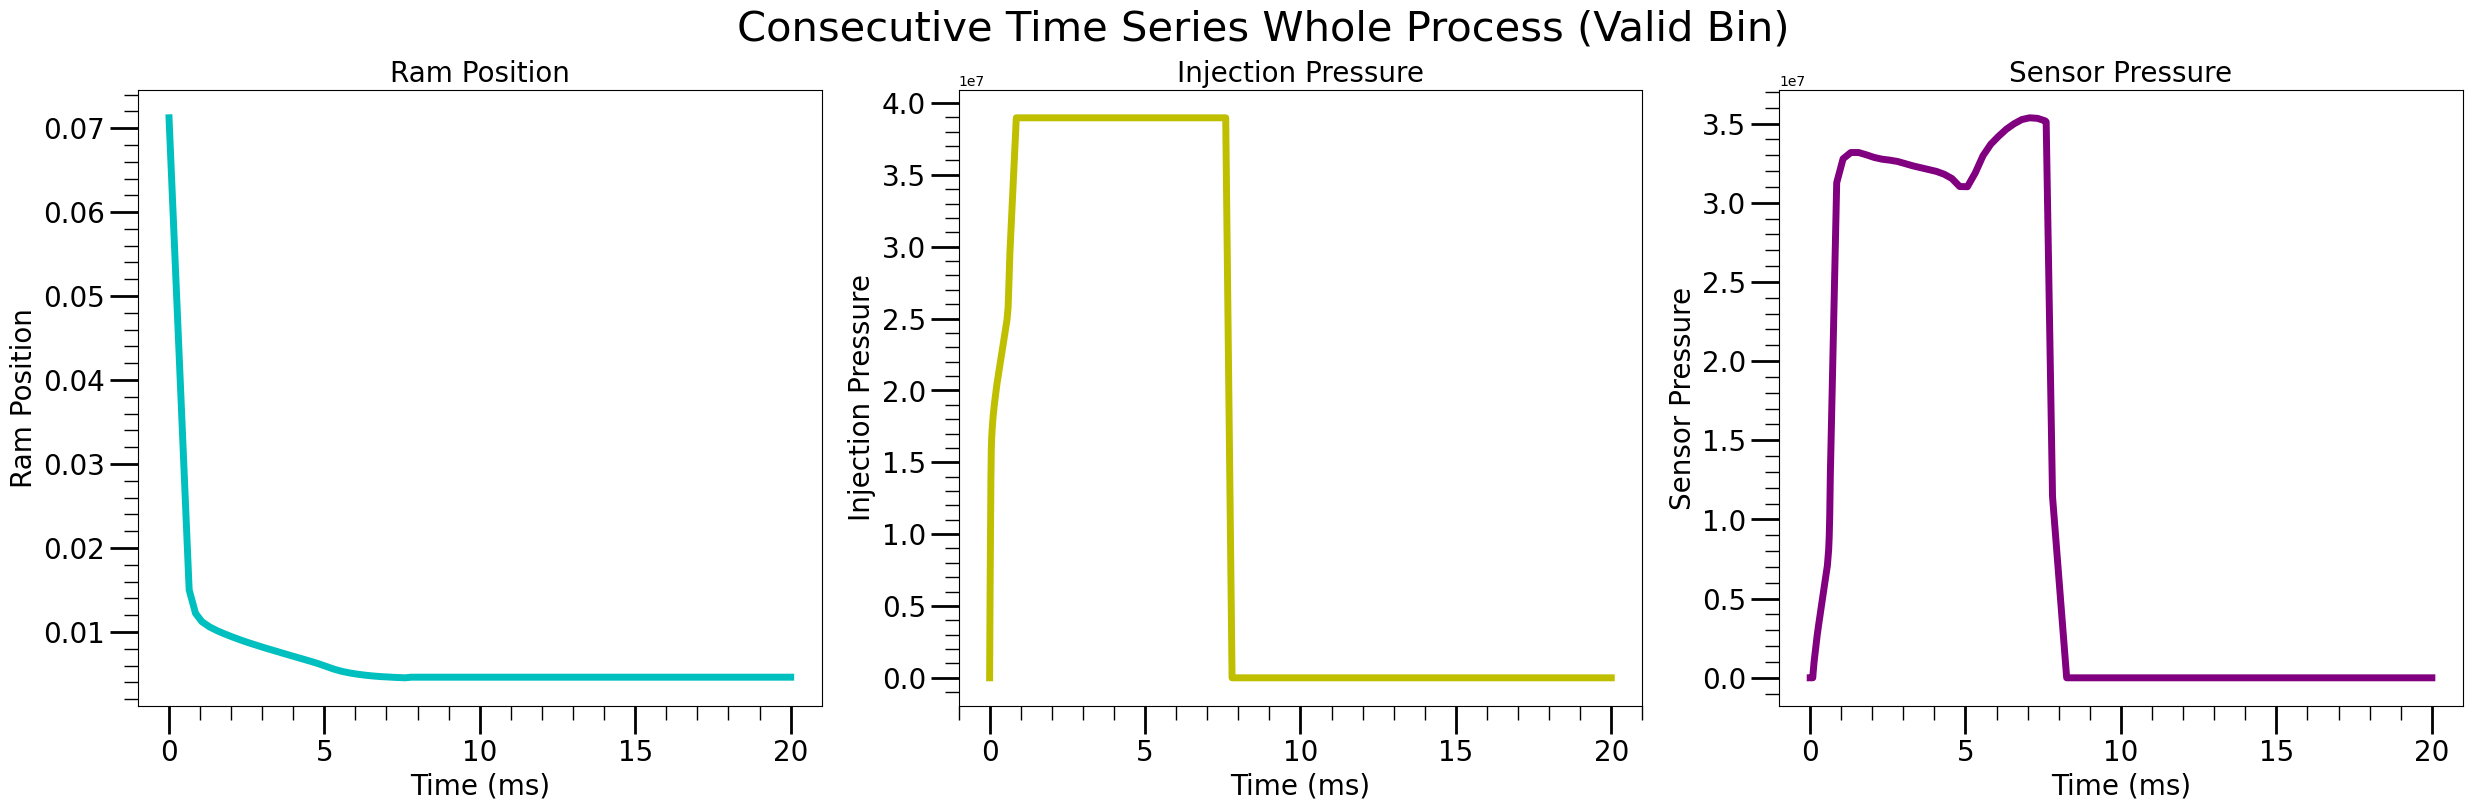

221


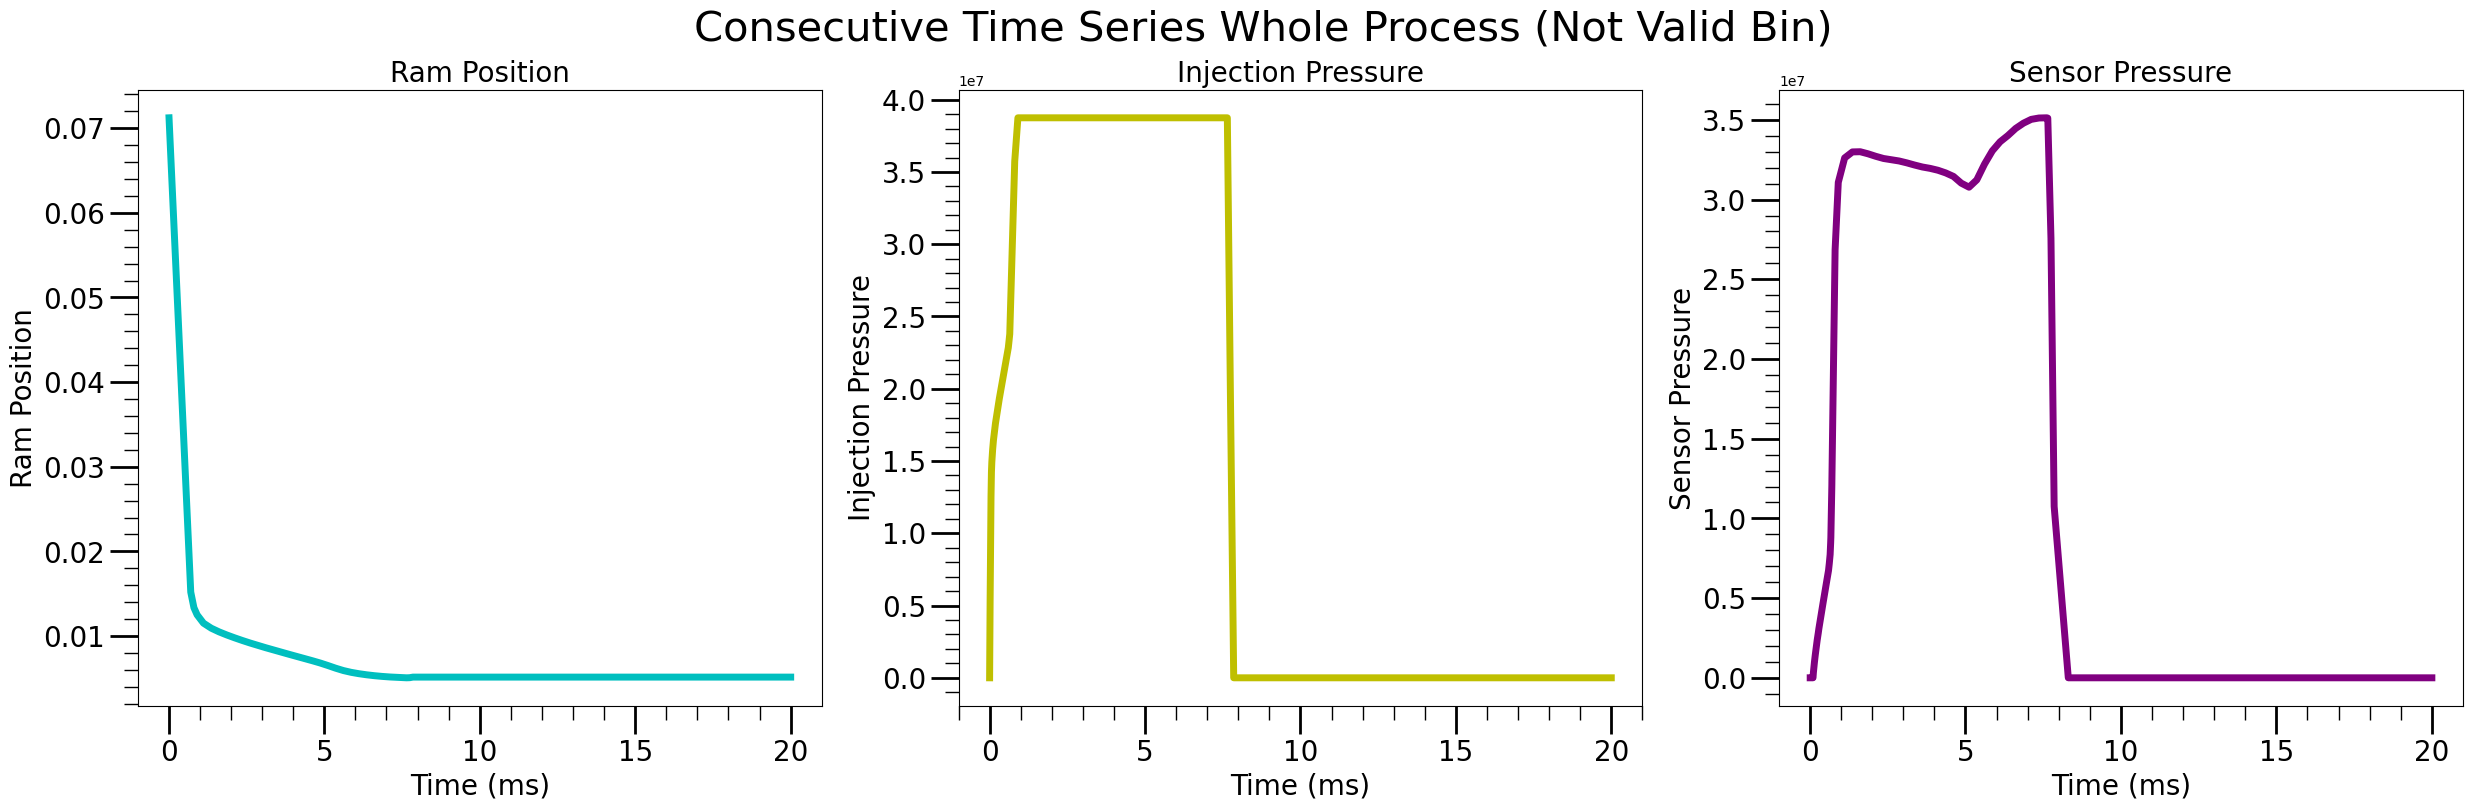

841


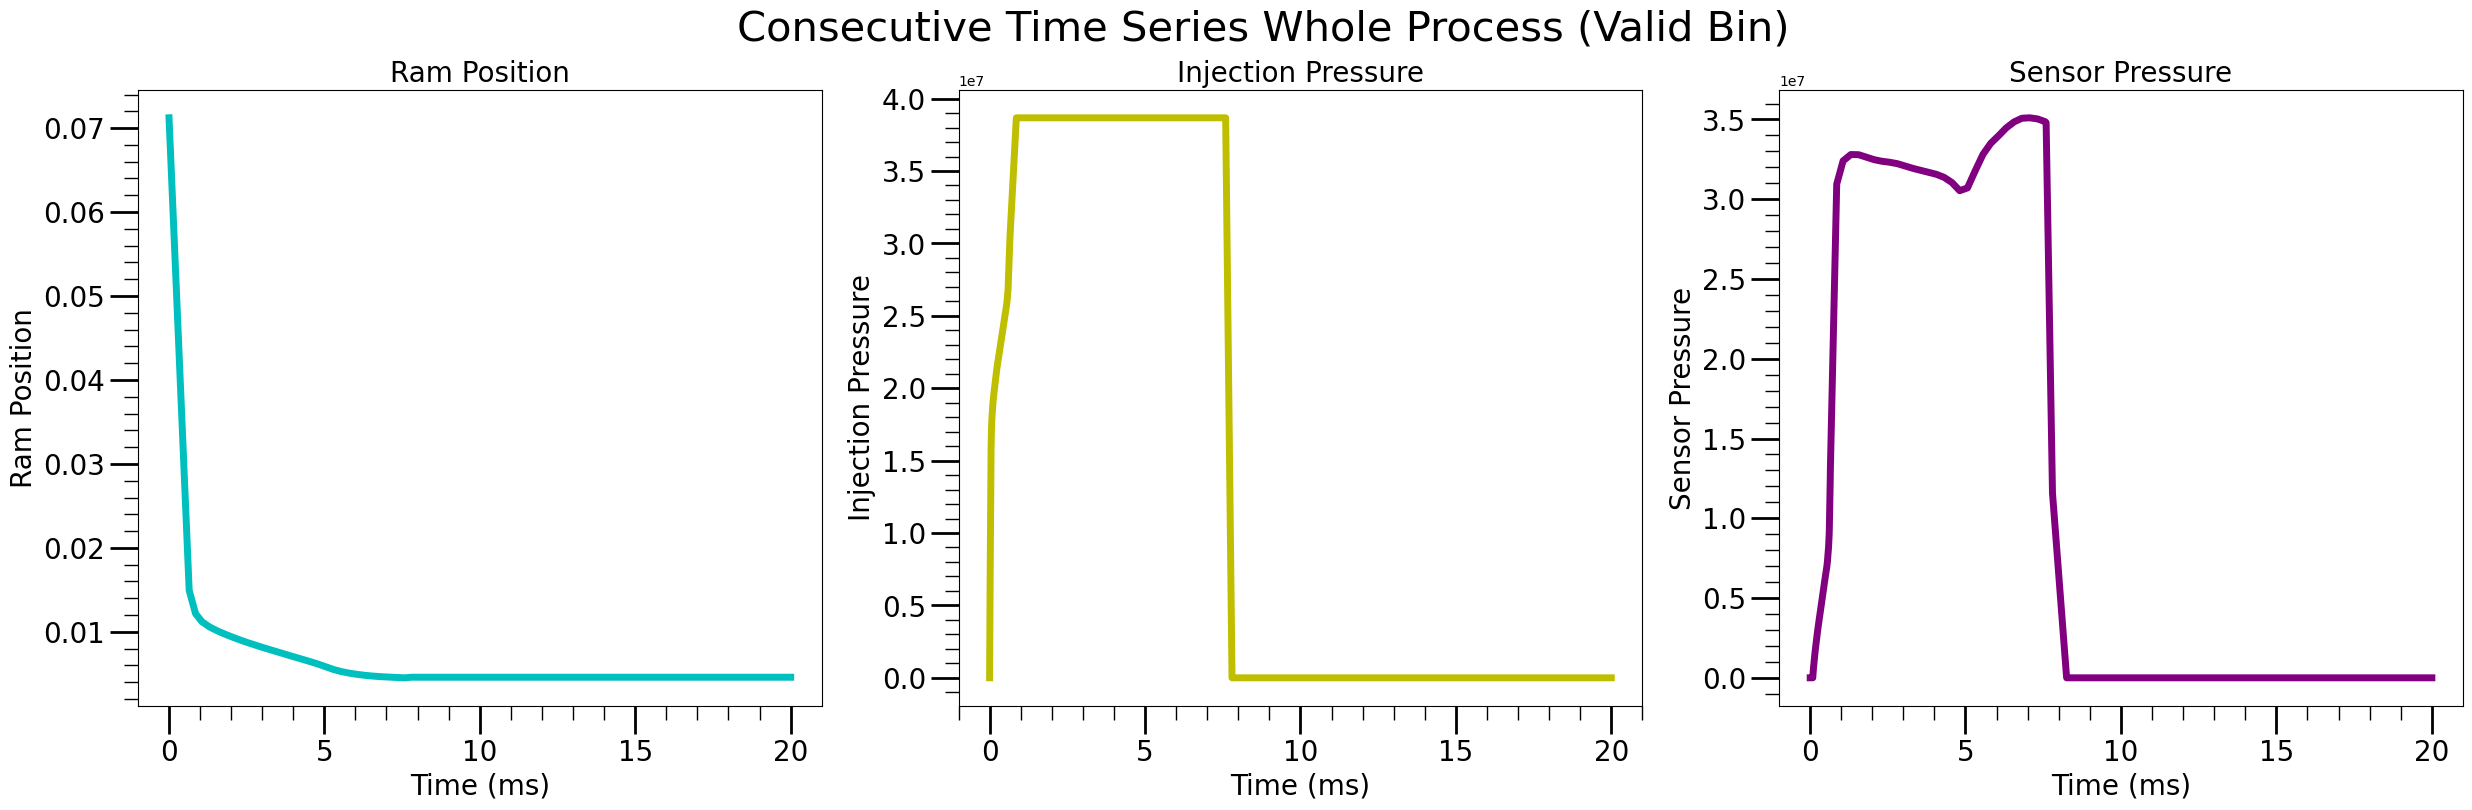

266


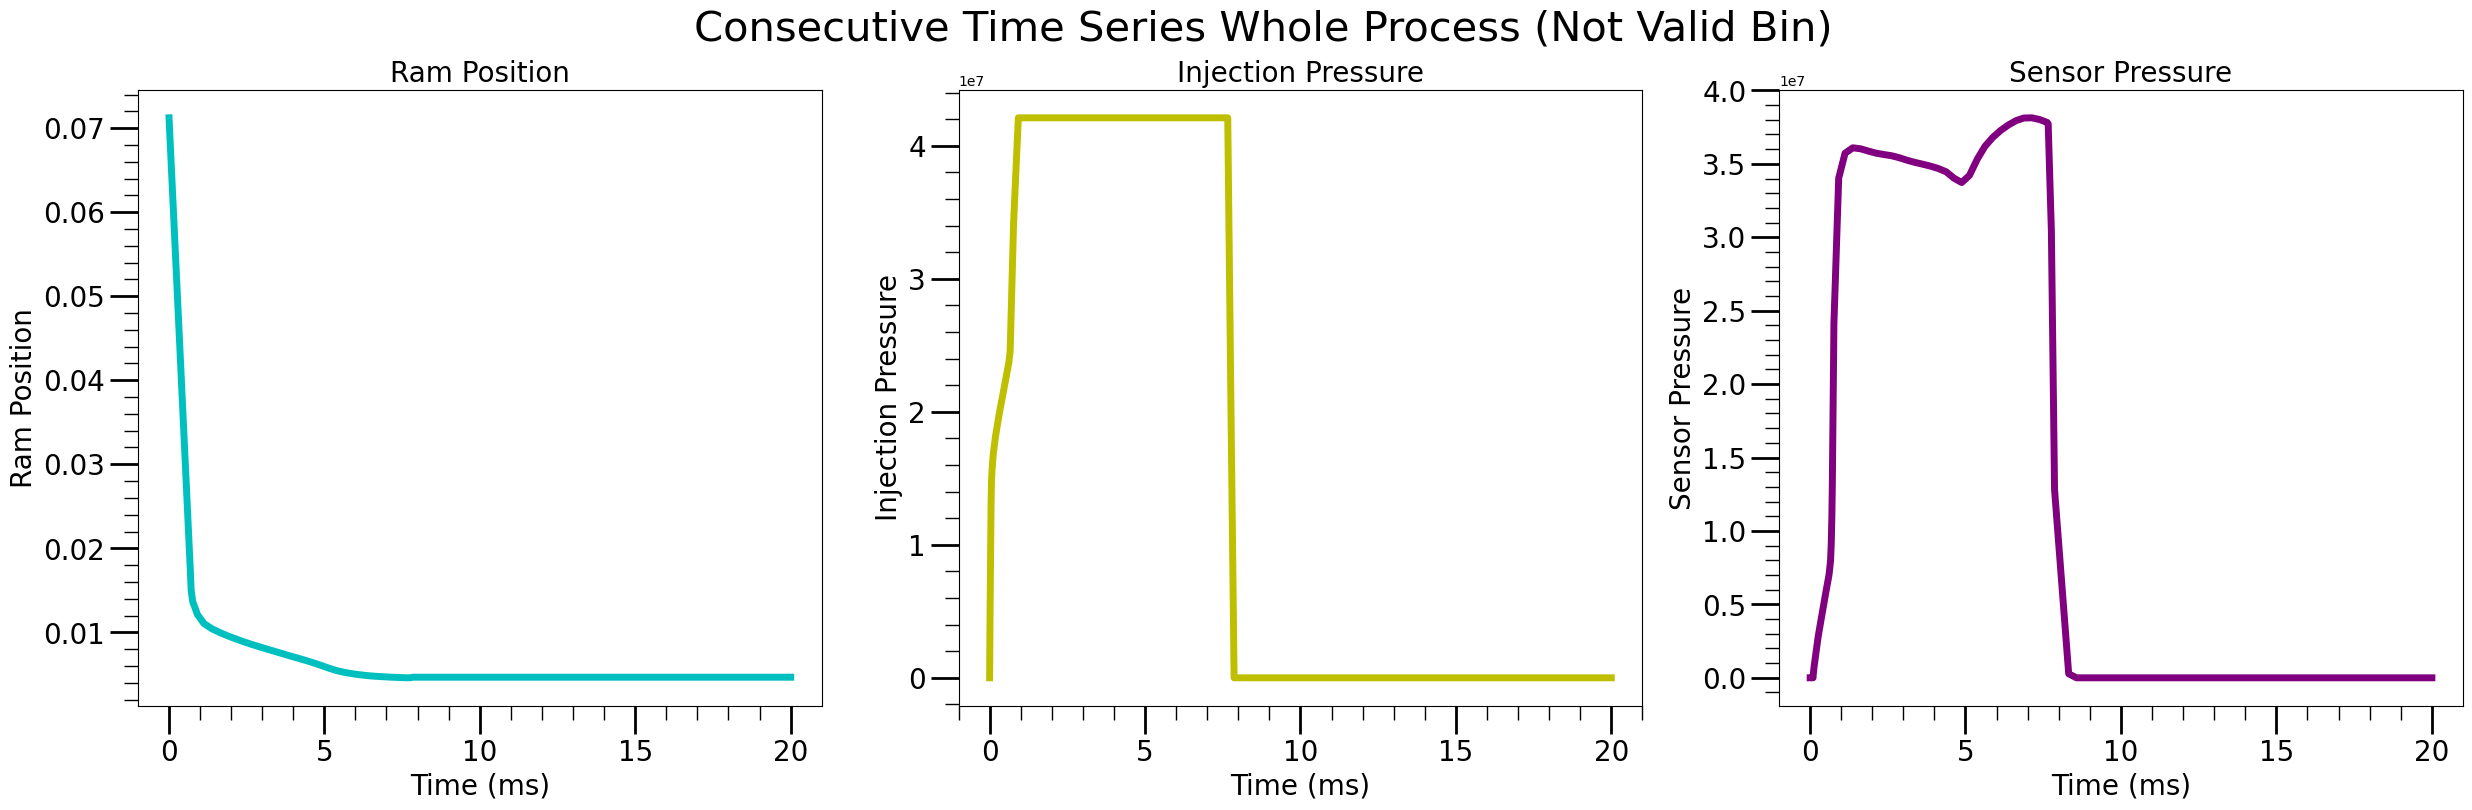

In [9]:
n = 3  # number of random population (max is len(not_valid_bins))
if n <= len(not_valid_bins):
    random_indices_v = np.random.randint(0, len(valid_bins), n)
    random_indices_nv = np.random.randint(0, len(not_valid_bins), n)
    print(random_indices_v)
    print(random_indices_nv)
for i in range(n):
    valid_index = random_indices_v[i]
    print(valid_index)
    rptv = valid_bins.ramposition_time[valid_index]
    rpv = valid_bins.ramposition[valid_index]
    iptv = valid_bins.injection_pressure_time[valid_index]
    ipv = valid_bins.injection_pressure[valid_index]
    ptv = valid_bins.sensor_pressure_time[valid_index]
    pv = valid_bins.sensor_pressure[valid_index]
    show3_time_series(rptv, rpv, iptv, ipv, ptv, pv, True)
    n_valid_index = random_indices_nv[i]
    print(n_valid_index)
    rptnv = not_valid_bins.ramposition_time[n_valid_index]
    rpnv = not_valid_bins.ramposition[n_valid_index]
    iptnv = not_valid_bins.injection_pressure_time[n_valid_index]
    ipnv = not_valid_bins.injection_pressure[n_valid_index]
    ptnv = not_valid_bins.sensor_pressure_time[n_valid_index]
    pnv = not_valid_bins.sensor_pressure[n_valid_index]
    show3_time_series(rptnv, rpnv, iptnv, ipnv, ptnv, pnv, False)

### Visual Analysis
- To the naked eye is hard to determine the qualitatively difference between the valid bins and not valid bins.
- Some values such the the Injection Pressure Maximum, the value of the local minimum of the Sensor Pressure seems to have a correlation that could distinguish between the a valid and a not valid bin. However this analysis is not conclusive but speculative. Nonetheless technically speaking variations on the pressure would determine a bin to be faulty due to lack of material during the molding.

### Reading Label Data

In [10]:
# There are only 5 labels
# Y1: box opening (in mm), Y2: valid/non-valid, Y3: box weight (in grams)
# Y4: valid/non-valid, Y5: time it took to fill the mould (in seconds)
Y = [[] for _ in range(6)]
base_name = "./Data/Y"
for i in range(5):
    Y[i] = hp.read_Y(base_name + str(i + 1) + ".csv")

## Feature Engineering Extraction using the Helper Module

- We verify if the engineered features were already extracted or not. (It is a lengthy process so better do so!)

In [11]:
ram_features_path = "./Data/ram_features.csv"
injection_pressure_features_path = "./Data/injection_pressure_features.csv"
sensor_pressure_features_path = "./Data/sensor_pressure_features.csv"

In [12]:
if update_results:
    print("Generating the features from the time series ...")
    ram_features = hp.time_series2features(input_data["ramposition"], input_data["ramposition_time"])
    injection_pressure_features = hp.time_series2features(input_data["injection_pressure"], input_data["injection_pressure_time"])
    sensor_pressure_features = hp.time_series2features(input_data["sensor_pressure"], input_data["sensor_pressure_time"])
    np.savetxt("./Data/ram_features.csv", ram_features, delimiter=",")
    np.savetxt("./Data/injection_pressure_features.csv", injection_pressure_features, delimiter=",")
    np.savetxt("./Data/sensor_pressure_features.csv", sensor_pressure_features, delimiter=",")
else:
    if not os.path.exists(ram_features_path):
        print("Generating the ram features from the time series ...")
        ram_features = hp.time_series2features(input_data["ramposition"], input_data["ramposition_time"])
        np.savetxt("./Data/ram_features.csv", ram_features, delimiter=",")
    else:
        print("Loading the ram features from disk ...")
        ram_features = pd.read_csv("./Data/ram_features.csv", header=None)
    if not os.path.exists(injection_pressure_features_path):
        injection_pressure_features = hp.time_series2features(input_data["injection_pressure"], input_data["injection_pressure_time"])
        np.savetxt("./Data/injection_pressure_features.csv", injection_pressure_features, delimiter=",")
    else:
        print("Loading the injection pressure features from disk ...")
        injection_pressure_features = pd.read_csv("./Data/ram_features.csv", header=None)
    if not os.path.exists(sensor_pressure_features_path):
        sensor_pressure_features = hp.time_series2features(input_data["sensor_pressure"], input_data["sensor_pressure_time"])
        np.savetxt("./Data/sensor_pressure_features.csv", sensor_pressure_features, delimiter=",")
    else:
        print("Loading the sensor pressure features from disk ...")
        sensor_pressure_features = pd.read_csv("./Data/ram_features.csv", header=None)

Loading the ram features from disk ...
Loading the injection pressure features from disk ...
Loading the sensor pressure features from disk ...


### Writing to disk the extracted features

In [13]:
if update_results:
    print("Saving results to disk ...")
    np.savetxt("./Data/ram_features.csv", ram_features, delimiter=",")
    np.savetxt("./Data/injection_pressure_features.csv", injection_pressure_features, delimiter=",")
    np.savetxt("./Data/sensor_pressure_features.csv", sensor_pressure_features, delimiter=",")

In [14]:
# we check the new type and shape of the newly engineered features:
print(f"Ram engineered features are: {type(ram_features)}, {ram_features.shape}")
print(f"Injection pressure engineered features are: {type(injection_pressure_features)}, {injection_pressure_features.shape}")
print(f"Sensor pressure engineered features are: {type(sensor_pressure_features)}, {sensor_pressure_features.shape}")

Ram engineered features are: <class 'pandas.core.frame.DataFrame'>, (1542, 22)
Injection pressure engineered features are: <class 'pandas.core.frame.DataFrame'>, (1542, 22)
Sensor pressure engineered features are: <class 'pandas.core.frame.DataFrame'>, (1542, 22)


## Analysis

### Input Data
- The feature engineered have a matrix with shape (22, 1542) $\equiv$ (features, number of datapoints)
- The features have the following meaning:
- Columsn 0 - 21 (total of 22 values)
    - last_point_in_time
    - peak_value
    - peak_time
    - peak_width
    - peak_prominence
    - peak2_value
    - peak2_time
    - peak2_width
    - peak2_prominence
    - mean
    - median
    - min
    - max
    - std
    - 75%quantile
    - 90%quantile
    - root-mean-square
    - skew  (extent of asymmetry)
    - kurtosis  (degree of peakness)
    - change_time (time of most abrupt change in series)
    - value just before middle
    - value just after middle

In [15]:
# loading feature engineered data in a dataframe
# we rename the column names to not have issues when joining the dataframes

full_data_df = pd.DataFrame()
ramp_df = pd.read_csv("./Data/ram_features.csv", header=None)

injectionp_df = pd.read_csv("./Data/injection_pressure_features.csv", header=None)
injectionp_df.columns = np.arange(22, 44, dtype=int)

sensorp_df = pd.read_csv("./Data/sensor_pressure_features.csv", header=None)
sensorp_df.columns = np.arange(44, 66, dtype=int)

labels_df = pd.read_csv("./Data/Y2.csv", header=None)

full_data_df = ramp_df.join(injectionp_df.join(sensorp_df))
full_data_df[66] = labels_df
full_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029574,...,1.348450e+07,12153000.0,36289200.0,1.810414e+07,1.183458,-0.425242,0.656510,19348500.0,0.759095,1
1,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029305,...,1.183386e+07,12232000.0,32058500.0,1.635327e+07,1.100449,-0.568736,0.174720,17200000.0,0.755031,1
2,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029168,...,1.173513e+07,12930000.0,32070000.0,1.640097e+07,1.093430,-0.552906,0.734860,17237500.0,0.760460,1
3,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029315,...,1.247266e+07,11968000.0,33437000.0,1.695804e+07,1.113614,-0.569749,0.177975,17847000.0,0.762628,1
4,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029339,...,1.298727e+07,12652000.0,35078200.0,1.765239e+07,1.147779,-0.482242,0.670877,18733500.0,0.729493,1


- We normalize the data before proceeding to use boxplot for every feature

In [16]:
cols_to_norm = [i for i in range(0, 66)]  # we exclude the labels
full_data_df[cols_to_norm] = full_data_df[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std())
full_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.501974,...,1.045017,-0.726272,1.080923,0.919813,1.672058,1.169527,-0.376692,1.087917,0.239571,1
1,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.518824,...,-0.800240,-0.584643,-0.892881,-0.827658,-0.972617,-0.902328,-0.580061,-0.931479,0.126121,1
2,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.548079,...,-0.910617,0.666707,-0.887516,-0.780052,-1.196270,-0.673753,-0.343620,-0.896233,0.277676,1
3,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.443703,...,-0.086129,-1.057934,-0.249751,-0.224066,-0.553176,-0.916950,-0.578687,-0.323358,0.338197,1
4,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.269275,...,0.489163,0.168318,0.515940,0.468939,0.535320,0.346533,-0.370627,0.509872,-0.586794,1


- **Note**: The NaN values are generated from columns which statistically have no relevance. The standard deviation of those numbers are zero (floating point) and its division by it during normalization produce those values.
- Now we will proceed to drop those features which do not contribute for our use case that consists of binary classification between valid and not valid bins.

In [17]:
# we will not yet drop inplace=Tru the NaN before we will do boxplot it
full_data_df.dropna(axis=1).describe()  # we drop along the columns axis=1

,0,9,10,11,12,13,14,15,16,17,...,57,58,59,60,61,62,63,64,65,66
count,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,...,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1542.000000
mean,-9.996757e-01,1.948233e-14,6.801304e-15,1.680742e-15,-9.996757e-01,4.390205e-15,-4.510241e-14,-7.431669e-14,-2.044078e-14,1.594344e-15,...,-2.820053e-15,-1.198062e-16,-1.251053e-15,1.760229e-15,-1.271789e-15,4.607930e-16,1.036784e-16,-1.211885e-15,3.317709e-15,0.700389
std,2.221166e-16,1.000000e+00,1.000000e+00,1.000000e+00,2.221166e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.458236
min,-9.996757e-01,-2.718529e+00,-2.980763e+00,-3.562554e+00,-9.996757e-01,-3.392491e+00,-2.791275e+00,-2.713996e+00,-2.562774e+00,-3.802716e+00,...,-2.749356e+00,-3.568701e+00,-2.512066e+00,-2.730771e+00,-2.577519e+00,-1.293336e+00,-5.895006e-01,-2.519926e+00,-1.165349e+00,0.000000
25%,-9.996757e-01,-7.024125e-01,-7.518754e-01,-6.368523e-01,-9.996757e-01,-6.701804e-01,-5.668019e-01,-8.112096e-01,-8.058754e-01,-5.712700e-01,...,-7.248681e-01,-6.126554e-01,-7.202132e-01,-7.116764e-01,-7.111062e-01,-7.808198e-01,-5.766925e-01,-7.136551e-01,-5.320928e-01,0.000000
50%,-9.996757e-01,-7.296535e-02,2.327431e-02,-1.440073e-02,-9.996757e-01,2.249234e-03,-1.009711e-01,-9.383351e-02,1.239774e-02,1.194674e-01,...,1.341570e-02,2.758586e-02,2.299008e-02,1.116590e-02,-2.630358e-01,-3.717274e-01,-3.682354e-01,2.464398e-02,-1.152257e-01,1.000000
75%,-9.996757e-01,6.561977e-01,4.365399e-01,6.573717e-01,-9.996757e-01,6.552018e-01,6.226369e-01,6.425953e-01,5.297110e-01,6.938897e-01,...,7.145871e-01,6.814970e-01,6.994893e-01,7.253287e-01,5.821131e-01,4.717218e-01,-3.450059e-01,6.970319e-01,1.821477e-01,1.000000
max,-9.996757e-01,3.443609e+00,3.764368e+00,3.516085e+00,-9.996757e-01,3.549042e+00,3.578569e+00,3.457427e+00,3.815630e+00,3.356335e+00,...,2.571423e+00,3.389021e+00,2.421489e+00,2.402760e+00,6.999047e+00,9.178524e+00,2.666114e+00,2.378413e+00,4.206606e+00,1.000000


### Analysis of the ramp position dataframe with engineered features

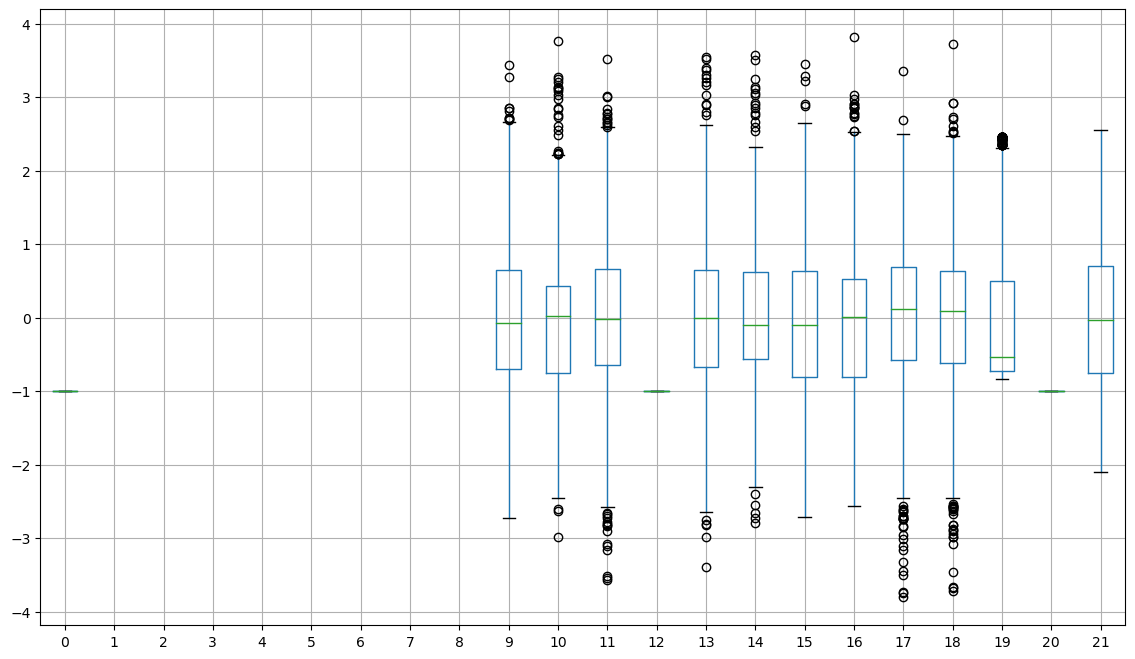

In [18]:
columns_given_0 = [i for i in range(22)]
full_data_df.boxplot(column=columns_given_0, figsize=(14, 8))
plt.show()

### Analysis of the injection pressure dataframe with engineered features

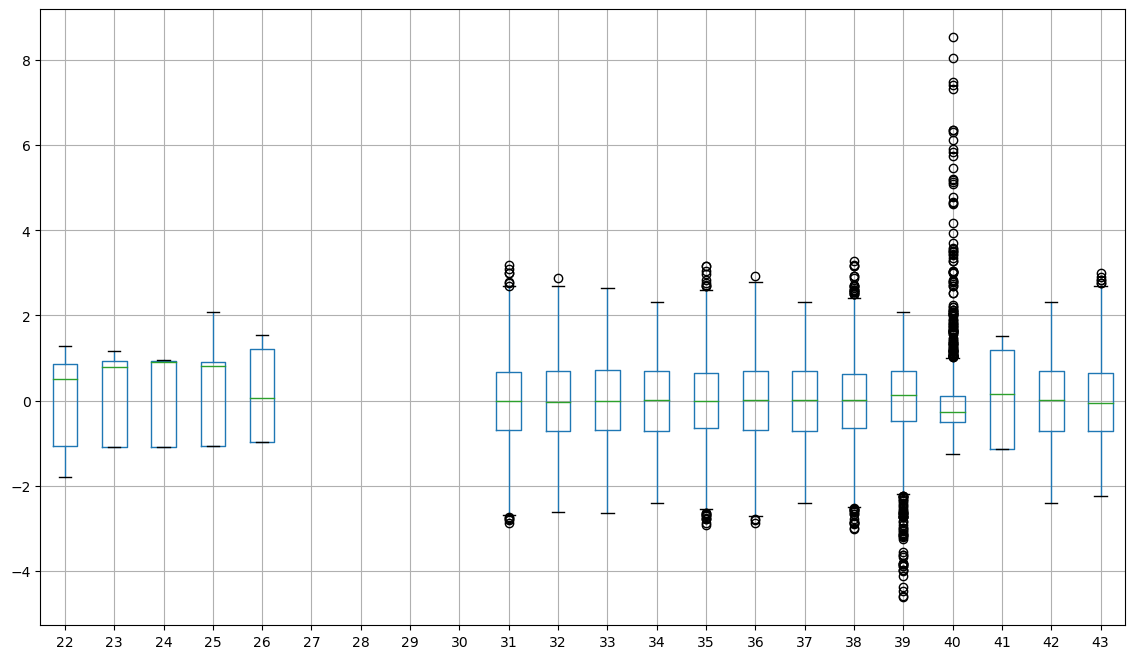

In [19]:
columns_given_1 = [i for i in range(22, 44)]
full_data_df.boxplot(column=columns_given_1, figsize=(14, 8))
plt.show()

### Analysis of the sensor pressure dataframe with engineered features

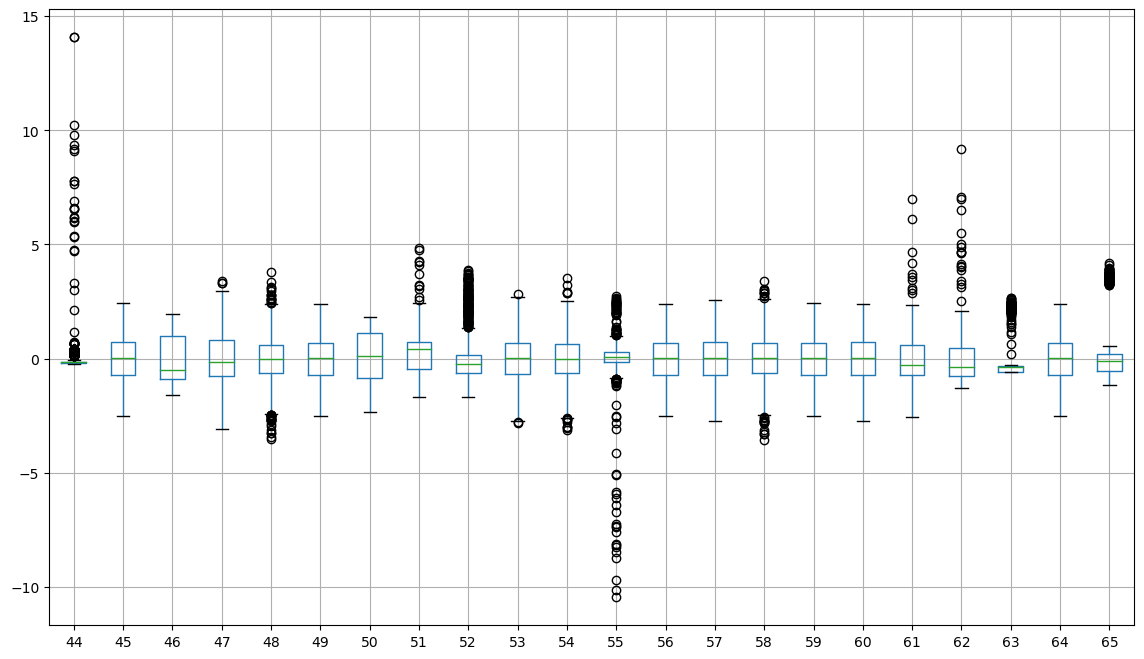

In [20]:
columns_given_2 = [i for i in range(44, 66)]
full_data_df.boxplot(column=columns_given_2, figsize=(14, 8))
plt.show()

In [21]:
# Checking datatypes
full_data_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
62    float64
63    float64
64    float64
65    float64
66      int64
Length: 67, dtype: object

In [22]:
# Statistical description
full_data_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
count,1.542000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.542000e+03,...,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1542.000000
mean,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.948233e-14,...,-2.820053e-15,-1.198062e-16,-1.251053e-15,1.760229e-15,-1.271789e-15,4.607930e-16,1.036784e-16,-1.211885e-15,3.317709e-15,0.700389
std,2.221166e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.458236
min,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.718529e+00,...,-2.749356e+00,-3.568701e+00,-2.512066e+00,-2.730771e+00,-2.577519e+00,-1.293336e+00,-5.895006e-01,-2.519926e+00,-1.165349e+00,0.000000
25%,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.024125e-01,...,-7.248681e-01,-6.126554e-01,-7.202132e-01,-7.116764e-01,-7.111062e-01,-7.808198e-01,-5.766925e-01,-7.136551e-01,-5.320928e-01,0.000000
50%,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.296535e-02,...,1.341570e-02,2.758586e-02,2.299008e-02,1.116590e-02,-2.630358e-01,-3.717274e-01,-3.682354e-01,2.464398e-02,-1.152257e-01,1.000000
75%,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.561977e-01,...,7.145871e-01,6.814970e-01,6.994893e-01,7.253287e-01,5.821131e-01,4.717218e-01,-3.450059e-01,6.970319e-01,1.821477e-01,1.000000
max,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.443609e+00,...,2.571423e+00,3.389021e+00,2.421489e+00,2.402760e+00,6.999047e+00,9.178524e+00,2.666114e+00,2.378413e+00,4.206606e+00,1.000000


#### Prunning Data

In [23]:
full_data_df.dropna(axis=1, inplace=True)
full_data_df.head()

,0,9,10,11,12,13,14,15,16,17,...,57,58,59,60,61,62,63,64,65,66
0,-0.999676,1.501974,1.939444,-0.343346,-0.999676,0.564167,1.715246,1.649904,1.958295,-1.773758,...,1.045017,-0.726272,1.080923,0.919813,1.672058,1.169527,-0.376692,1.087917,0.239571,1
1,-0.999676,-0.518824,-0.486110,0.360816,-0.999676,-0.387596,-0.449908,-0.656303,-0.797283,0.815002,...,-0.800240,-0.584643,-0.892881,-0.827658,-0.972617,-0.902328,-0.580061,-0.931479,0.126121,1
2,-0.999676,-1.548079,-2.029322,-0.295393,-0.999676,-0.073770,-1.500208,-1.993306,-1.710538,1.163351,...,-0.910617,0.666707,-0.887516,-0.780052,-1.196270,-0.673753,-0.343620,-0.896233,0.277676,1
3,-0.999676,-0.443703,-0.014819,-0.403499,-0.999676,0.731069,-0.191695,0.538220,-0.031719,-0.341763,...,-0.086129,-1.057934,-0.249751,-0.224066,-0.553176,-0.916950,-0.578687,-0.323358,0.338197,1
4,-0.999676,-0.269275,0.172989,-0.852749,-0.999676,0.531535,0.056051,-0.141051,0.033288,-0.487708,...,0.489163,0.168318,0.515940,0.468939,0.535320,0.346533,-0.370627,0.509872,-0.586794,1


- The length of the dataset after prunning is:

In [24]:
print(f"The number of datapoints is {len(full_data_df)}")
# we subtract the label from the number of attributes/features
print(f"The number of effective attributes/features is {len(full_data_df.columns) - 1}")

The number of datapoints is 1542
The number of effective attributes/features is 54


In [25]:
full_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1542 non-null   float64
 1   9       1542 non-null   float64
 2   10      1542 non-null   float64
 3   11      1542 non-null   float64
 4   12      1542 non-null   float64
 5   13      1542 non-null   float64
 6   14      1542 non-null   float64
 7   15      1542 non-null   float64
 8   16      1542 non-null   float64
 9   17      1542 non-null   float64
 10  18      1542 non-null   float64
 11  19      1542 non-null   float64
 12  20      1542 non-null   float64
 13  21      1542 non-null   float64
 14  22      1542 non-null   float64
 15  23      1542 non-null   float64
 16  24      1542 non-null   float64
 17  25      1542 non-null   float64
 18  26      1542 non-null   float64
 19  31      1542 non-null   float64
 20  32      1542 non-null   float64
 21  33      1542 non-null   float64
 22  

- From the above we see that are not object data types, which means that there are no mixing datatypes.
- This also means that there is no need to use the `Imputer` of the `sklearn.preprocessing` library.

### Assessment of IID

- **IID**: Independent and Identitically Distributed Random Variables
#### Independence

- We will assume that during the simulated generation of the dataset one has no correlation between the previous generated datapoints, therefore we could take independence for granted.

#### Identically Distributed
- In our binary classification between valid and not valid bins we have to make sure that these two classes are indentically distributed. Leaving appart the possible skewness we will analyse the imbalance by counting the number of datapoints that correspond to each class respectively (valind and not valid)

In [26]:
# We create a function to qualitatively check for the imbalance of the dataset
def check_imbalance(label: pd.Series) -> None:
    pv = np.count_nonzero(label) / len(label) * 100
    print(f"The imbalance profile has:\n {pv:.2f}% of valid products and \
        \n {100 - pv:.2f}% of invalid products")

In [27]:
print('For the full dataset,')
check_imbalance(full_data_df[66])

For the full dataset,
The imbalance profile has:
 70.04% of valid products and         
 29.96% of invalid products


## Conclusions

- From the figures, we observe that potentially one has the opportunity to differentiate the bin classes valid and not valid by using the `Helper.py` module and feature enginnered dataset.
- From the new engineered dataset we observer that we will require some preprocessing. More specifically we will create in what follows a pipeline that will perform the following:
    - Standarization
    - Removal of NaN values
    - Address of Imbalance Issue (here we will use the `imblearn.over_sampling` and from it the `SMOTE` function):
    ```python
    from imblearn.over_sampling import SMOTE
    ```